In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load dataset
df = pd.ExcelFile('/content/bankruptcy-prevention.xlsx')

In [ ]:
df.sheet_names #This Attribute is used to return a list of all names in the Excel Workbook.

['bankruptcy-prevention']

In [ ]:
# Load the dataset from the identified sheet
df = pd.read_excel(df, sheet_name='bankruptcy-prevention')

# Display basic information and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 1 columns):
 #   Column                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                        --------------  ----- 
 0   industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class  250 non-null    object
dtypes: object(1)
memory usage: 2.1+ KB


(None,
   industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
 0                         0.5;1;0;0;0;0.5;bankruptcy                                                          
 1                             0;1;0;0;0;1;bankruptcy                                                          
 2                             1;0;0;0;0;1;bankruptcy                                                          
 3                         0.5;0;0;0.5;0;1;bankruptcy                                                          
 4                             1;1;0;0;0;1;bankruptcy                                                          )

In [ ]:
"""
The dataset is not properly parsed in separate columns.
The issue is that all values are stored in a single column
instead of being split into multiple columns.
"""

'\nThe dataset is not properly parsed in separate columns.\nThe issue is that all values are stored in a single column\ninstead of being split into multiple columns.\n'

In [ ]:
# To Split the single column into multiple columns using semicolon as the delimiter
df = df.iloc[:, 0].str.split(";", expand=True)

In [ ]:
df.head()

,0,1,2,3,4,5,6
0,0.5,1,0,0,0,0.5,bankruptcy
1,0,1,0,0,0,1,bankruptcy
2,1,0,0,0,0,1,bankruptcy
3,0.5,0,0,0.5,0,1,bankruptcy
4,1,1,0,0,0,1,bankruptcy


In [ ]:
df.columns

RangeIndex(start=0, stop=7, step=1)

In [ ]:
# Nameing the columns of the dataset df
df.columns = ["industrial_risk", "management_risk", "financial_flexibility",
    "credibility", "competitiveness", "operating_risk", "class"]

In [ ]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1,0,0,0,0.5,bankruptcy
1,0,1,0,0,0,1,bankruptcy
2,1,0,0,0,0,1,bankruptcy
3,0.5,0,0,0.5,0,1,bankruptcy
4,1,1,0,0,0,1,bankruptcy


In [ ]:
df.info()# Asummary of the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   industrial_risk        250 non-null    object
 1   management_risk        250 non-null    object
 2   financial_flexibility  250 non-null    object
 3   credibility            250 non-null    object
 4   competitiveness        250 non-null    object
 5   operating_risk         250 non-null    object
 6   class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [ ]:
#data types of the columns
df.dtypes

,0
industrial_risk,object
management_risk,object
financial_flexibility,object
credibility,object
competitiveness,object
operating_risk,object
class,object


In [ ]:
#Data Structure
df.shape

(250, 7)

In [ ]:
#data type convertion - converting to float from object type
df['industrial_risk'] = df['industrial_risk'].astype(float)

In [ ]:
df['management_risk'] = df['management_risk'].astype(float)

In [ ]:
df['financial_flexibility'] = df['financial_flexibility'].astype(float)

In [ ]:
df['credibility'] = df['credibility'].astype(float)

In [ ]:
df['competitiveness'] = df['competitiveness'].astype(float)

In [ ]:
df['operating_risk'] = df['operating_risk'].astype(float)

In [ ]:
df.dtypes

,0
industrial_risk,float64
management_risk,float64
financial_flexibility,float64
credibility,float64
competitiveness,float64
operating_risk,float64
class,object


In [ ]:
unique_values = {col: df[col].unique() for col in df.columns}
print(unique_values)


{'industrial_risk': array([0.5, 0. , 1. ]), 'management_risk': array([1. , 0. , 0.5]), 'financial_flexibility': array([0. , 0.5, 1. ]), 'credibility': array([0. , 0.5, 1. ]), 'competitiveness': array([0. , 0.5, 1. ]), 'operating_risk': array([0.5, 1. , 0. ]), 'class': array(['bankruptcy', 'non-bankruptcy'], dtype=object)}


In [ ]:
#check duplicaties
df.duplicated().sum()

147

In [ ]:
# dropping the duplicated rows
df = df.drop_duplicates()

In [ ]:
# 103 Non-Duplicated rows with 7 columns each
df.shape

(103, 7)

In [ ]:
df.duplicated().sum()

0

In [ ]:
#checking null values
df.isnull().sum()
# has no null values

,0
industrial_risk,0
management_risk,0
financial_flexibility,0
credibility,0
competitiveness,0
operating_risk,0
class,0


In [ ]:
# checking outliers
if df.isnull().sum().sum() == 0:
    print("No missing values found in the dataset.")
else:
    # Define colors: Blue for non-missing, Yellow for missing
    plt.figure(figsize=(10, 6))
    sb.heatmap(df.isnull(), cmap=['#000099', '#ffff00'], cbar=False)
    plt.title("Missing Values Heatmap")
    plt.show()


No missing values found in the dataset.


In [ ]:
df.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

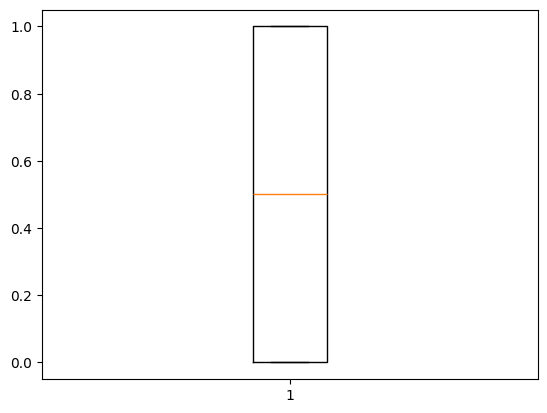

In [ ]:
# search for outliers for column - industrial_risk
Ir_box=plt.boxplot(df['industrial_risk'])
# there no outliers

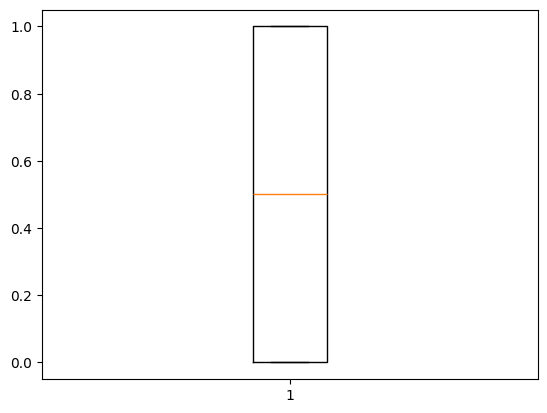

In [ ]:
# search for outliers for column - management_risk
mr_box=plt.boxplot(df['management_risk'])
# there no outliers

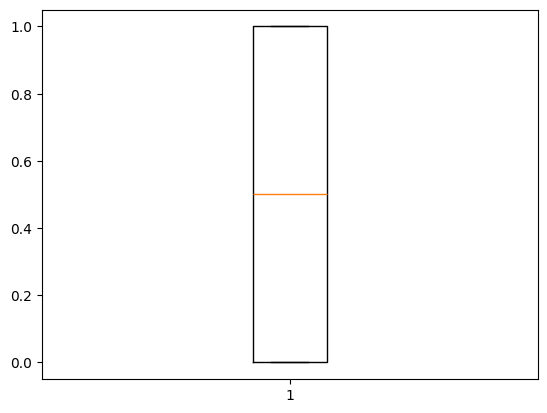

In [ ]:
# search for outliers for column - financial_flexibility
ff_box=plt.boxplot(df['financial_flexibility'])
# there no outliers

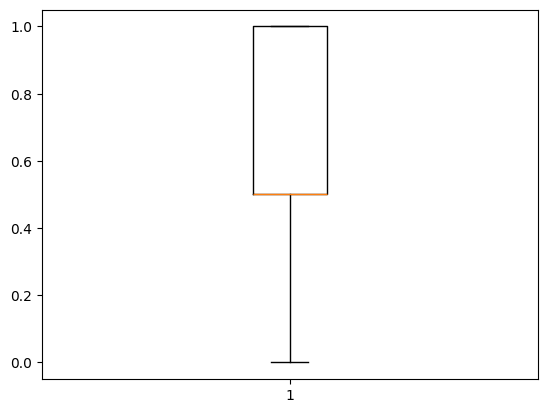

In [ ]:
# search for outliers for column - credibility
c_box=plt.boxplot(df['credibility'])
# there no outliers

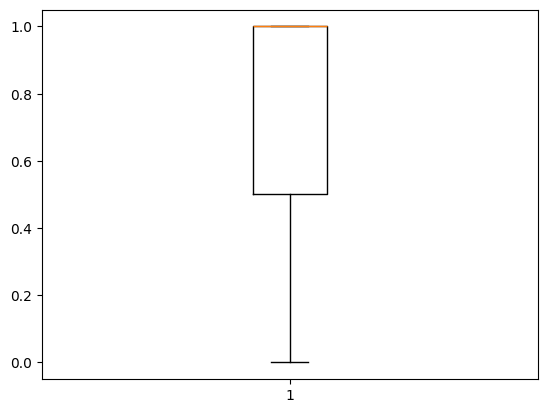

In [ ]:
# search for outliers for column - competitiveness
comp_box=plt.boxplot(df['competitiveness'])
# there no outliers

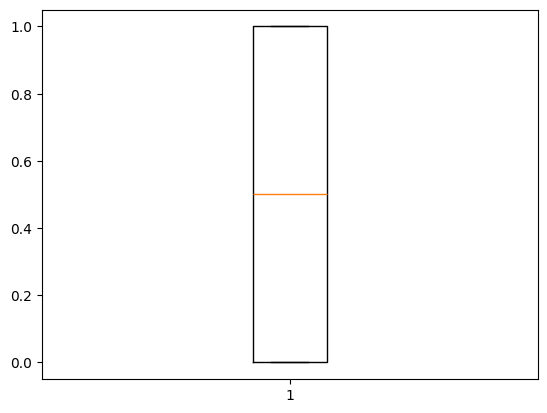

In [ ]:
# search for outliers for column - operating_risk
or_box=plt.boxplot(df['operating_risk'])
# there no outliers

In [ ]:
# checkinig for class imbalance
print(df["class"].value_counts())
#class imbalance is occuring.

class
non-bankruptcy    78
bankruptcy        25
Name: count, dtype: int64


In [ ]:
"""By the results, Class imbalance occurs when one class (e.g., "bankruptcy")
has significantly fewer instances than the other (e.g., "non-bankruptcy").
This can impact model performance, making it biased towards the majority class."""

'By the results, Class imbalance occurs when one class (e.g., "bankruptcy")\nhas significantly fewer instances than the other (e.g., "non-bankruptcy").\nThis can impact model performance, making it biased towards the majority class.'

In [ ]:
# To overcome the class imbalance, we use oversampling SMOTE(Synthetic Minority Over-sampling Technique)
#  -Increase minority clas samples.Because the dataset<250 samples
from imblearn.over_sampling import SMOTE

X = df.drop(columns=["class"])  # Features
y = df["class"]  # Target

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
# Checking class distribution after SMOTE
print(pd.Series(y_resampled).value_counts())

class
bankruptcy        78
non-bankruptcy    78
Name: count, dtype: int64


In [ ]:
# Encode the target variable
df["class"] = df["class"].map({"non-bankruptcy": 0, "bankruptcy": 1})

In [ ]:
# For model building check the type (relationship)
# of data-linear, non-linear and complex

In [ ]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,0
187,0.0,0.5,0.5,0.5,1.0,0.5,0
190,0.0,0.5,0.5,0.0,1.0,0.0,0
192,0.5,1.0,0.0,0.0,1.0,0.0,0


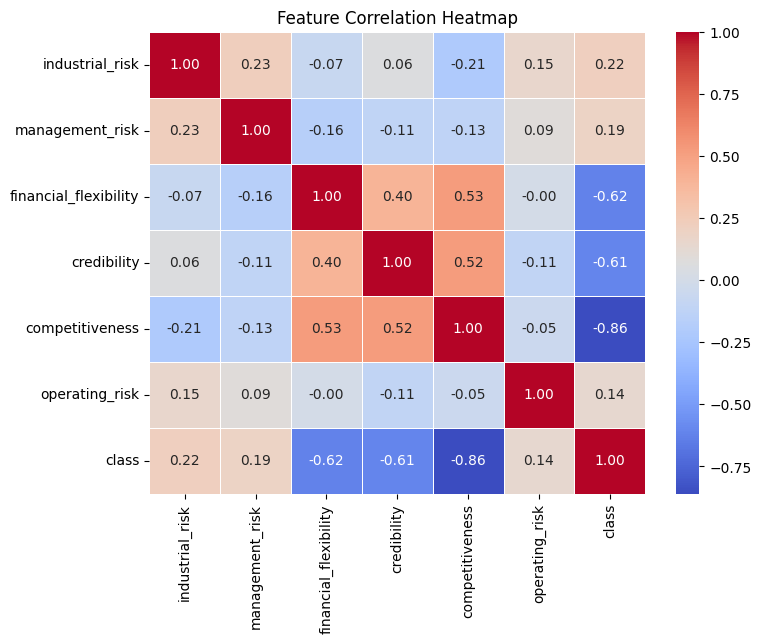

In [ ]:
#Checking for Linear Relationship
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
# interpertation - correlations are close to +1 or -1, data is likely linear

In [ ]:
# Split features and target

X = df.drop(columns=["class"])
y = df["class"]

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Standardize the features (important for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#we standardize the features before
# applying Logistic Regression to improve model performance

# Feature scaling (only for SVM and k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Train the model - Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)

print(" Logistic Regression:")
print(f"Accuracy: {accuracy_log:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log), "\n")


 Logistic Regression:
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

Confusion Matrix:
 [[16  0]
 [ 1  4]] 



In [ ]:
#Train the model - Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)

print(" Decision Tree Classifier:")
print(f"Accuracy: {accuracy_tree:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree), "\n")


 Decision Tree Classifier:
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

Confusion Matrix:
 [[16  0]
 [ 1  4]] 



In [ ]:
# Train the model - Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(" Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf), "\n")


 Random Forest Classifier:
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

Confusion Matrix:
 [[16  0]
 [ 1  4]] 



In [ ]:
# Train the model-SVM
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)  # Using scaled features
y_pred_svm = svm_model.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(" Support Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm), "\n")


 Support Vector Machine (SVM):
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.60      0.75         5

    accuracy                           0.90        21
   macro avg       0.94      0.80      0.85        21
weighted avg       0.92      0.90      0.90        21

Confusion Matrix:
 [[16  0]
 [ 2  3]] 



In [ ]:
# Train the model -  Navie Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(" Naïve Bayes Classifier:")
print(f"Accuracy: {accuracy_nb:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb), "\n")


 Naïve Bayes Classifier:
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.60      0.75         5

    accuracy                           0.90        21
   macro avg       0.94      0.80      0.85        21
weighted avg       0.92      0.90      0.90        21

Confusion Matrix:
 [[16  0]
 [ 2  3]] 



In [ ]:
# Train the model - k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)  # Using scaled features
y_pred_knn = knn_model.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(" k-Nearest Neighbors (k-NN):")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn), "\n")


 k-Nearest Neighbors (k-NN):
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

Confusion Matrix:
 [[16  0]
 [ 1  4]] 



In [ ]:
# Train the model-Gradient Boosting (XGBoost)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(" XGBoost Classifier:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb), "\n")


 XGBoost Classifier:
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

Confusion Matrix:
 [[16  0]
 [ 1  4]] 



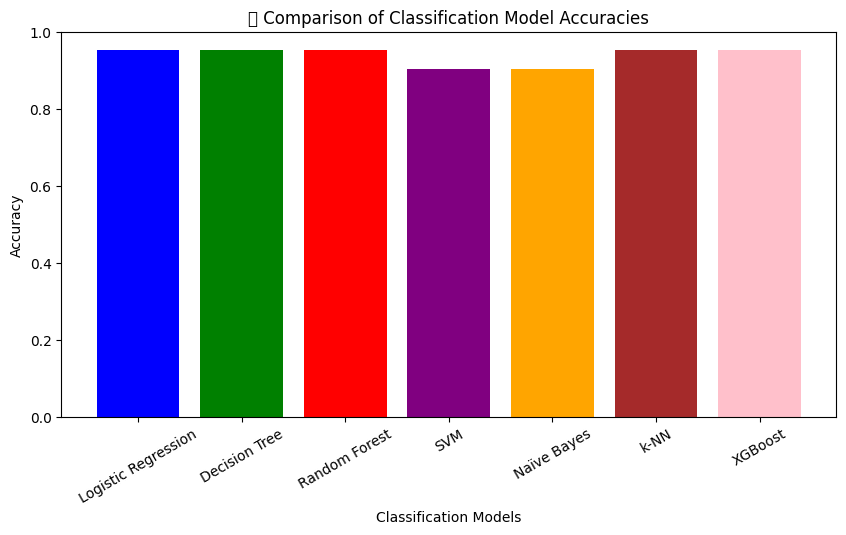

In [ ]:
# Compare Model Performance
models = [
    'Logistic Regression', 'Decision Tree', 'Random Forest',
    'SVM', 'Naïve Bayes', 'k-NN', 'XGBoost'
]
accuracies = [accuracy_log, accuracy_tree, accuracy_rf, accuracy_svm, accuracy_nb, accuracy_knn, accuracy_xgb]

plt.figure(figsize=(10,5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink'])
plt.xlabel("Classification Models")
plt.ylabel("Accuracy")
plt.title("📊 Comparison of Classification Model Accuracies")
plt.ylim(0, 1)  # Since accuracy is between 0 and 1
plt.xticks(rotation=30)
plt.show()


In [ ]:
import sys
import subprocess

In [ ]:
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

In [ ]:
try:
    from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
    import matplotlib.pyplot as plt
    import pandas as pd
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from xgboost import XGBClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    import joblib
except ModuleNotFoundError as e:
    missing_module = str(e).split("'")[1]
    print(f"Module {missing_module} not found. Installing...")
    install(missing_module)
    from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
    import matplotlib.pyplot as plt
    import pandas as pd
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from xgboost import XGBClassifier
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    import joblib

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results.append({
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'ROC-AUC': roc_auc_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred)
        })
    return results #Fixed: Indentation aligned with the 'for' loop

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [ ]:
scaler = StandardScaler()

In [ ]:
results = evaluate_models(models, X_train, X_test, y_train, y_test)

In [ ]:
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='Accuracy', ascending=False)

In [ ]:
print(df_results)

                 Model  Accuracy  ROC-AUC  Precision  Recall  F1 Score
0  Logistic Regression  0.952381      0.9        1.0     0.8  0.888889
1        Decision Tree  0.952381      0.9        1.0     0.8  0.888889
2        Random Forest  0.952381      0.9        1.0     0.8  0.888889
5                 k-NN  0.952381      0.9        1.0     0.8  0.888889
6              XGBoost  0.952381      0.9        1.0     0.8  0.888889
3                  SVM  0.904762      0.8        1.0     0.6  0.750000
4          Naïve Bayes  0.904762      0.8        1.0     0.6  0.750000


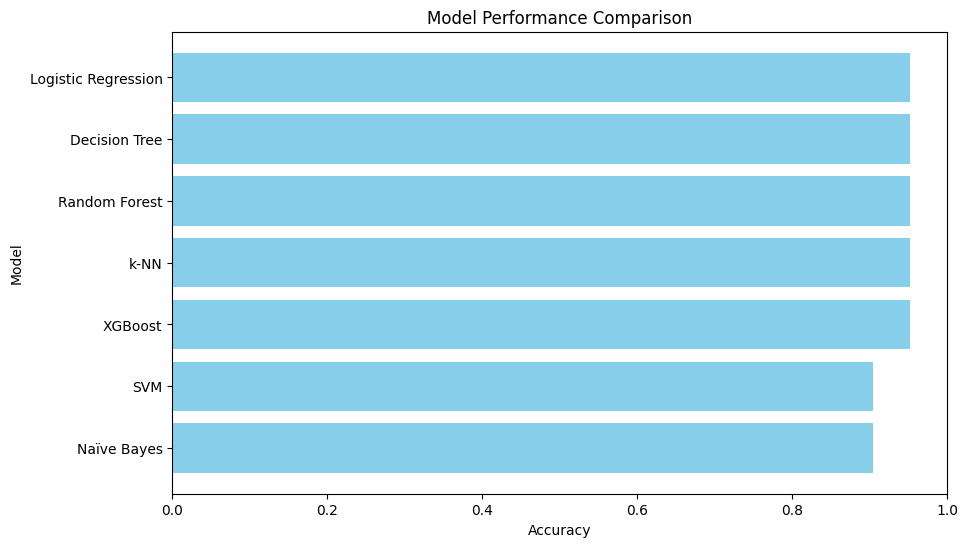

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(df_results['Model'], df_results['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Performance Comparison')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
best_model = df_results.iloc[0]['Model']
print(f"Best model based on Accuracy: {best_model}")
# return statement should only be present inside a function
# return df_results, models[best_model]

Best model based on Accuracy: Logistic Regression


In [ ]:
tuned_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

In [ ]:
df_results = evaluate_models(tuned_models, X_train, X_test, y_train, y_test)

In [ ]:
import joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import joblib
import numpy as np
import pandas as pd

In [ ]:
def load_model():
    return joblib.load('best_model.pkl')

In [ ]:
def predict(model, input_data):
    prediction = model.predict(input_data)
    return prediction[0]

In [ ]:
# Streamlit UI
st.title('Bankruptcy Prediction App')
st.write('Enter the financial details to predict bankruptcy risk.')

2025-02-25 05:15:39.957 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 05:15:40.149 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-25 05:15:40.158 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 05:15:40.161 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 05:15:40.163 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 05:15:40.166 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 05:15:40.168 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
 #User Inputs (Modify based on dataset features)
feature1 = st.number_input('Feature 1', min_value=0.0, max_value=100.0, value=50.0)
feature2 = st.number_input('Feature 2', min_value=0.0, max_value=100.0, value=50.0)
feature3 = st.number_input('Feature 3', min_value=0.0, max_value=100.0, value=50.0)
feature4 = st.number_input('Feature 4', min_value=0.0, max_value=100.0, value=50.0)
feature5 = st.number_input('Feature 5', min_value=0.0, max_value=100.0, value=50.0)

2025-02-25 05:16:51.052 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 05:16:51.054 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 05:16:51.056 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 05:16:51.057 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 05:16:51.058 Session state does not function when running a script without `streamlit run`
2025-02-25 05:16:51.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 05:16:51.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 05:16:51.062 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 05:16

In [ ]:
# Convert inputs to NumPy array
input_features = np.array([[feature1, feature2, feature3, feature4, feature5]])

In [ ]:
if st.button('Predict'):
    model = load_model()
    prediction = predict(model, input_features)
    st.write(f'**Prediction:** {"Bankrupt" if prediction == 1 else "Not Bankrupt"}')

2025-02-25 05:17:34.104 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 05:17:34.106 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 05:17:34.107 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 05:17:34.108 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-25 05:17:34.108 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
!pip install pyngrok

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

def load_model():
    return joblib.load('best_model.pkl')

def predict(model, input_data):
    prediction = model.predict(input_data)
    return prediction[0]

st.title('Bankruptcy Prediction App')
st.write('Enter the financial details to predict bankruptcy risk.')

# User Inputs (Modify based on dataset features)
feature1 = st.number_input('Feature 1', min_value=0.0, max_value=100.0, value=50.0)
feature2 = st.number_input('Feature 2', min_value=0.0, max_value=100.0, value=50.0)
feature3 = st.number_input('Feature 3', min_value=0.0, max_value=100.0, value=50.0)
feature4 = st.number_input('Feature 4', min_value=0.0, max_value=100.0, value=50.0)
feature5 = st.number_input('Feature 5', min_value=0.0, max_value=100.0, value=50.0)

# Convert inputs to NumPy array
input_features = np.array([[feature1, feature2, feature3, feature4, feature5]])

if st.button('Predict'):
    model = load_model()
    prediction = predict(model, input_features)
    st.write(f'**Prediction:** {"Bankrupt" if prediction == 1 else "Not Bankrupt"}')


Writing app.py
